# Analysis of the error messages and creation of the word embeddings

In [1]:
import nltk
import pandas as pd
import numpy as np
import gensim
import itertools
from collections import Counter

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [3]:
from nltk.tokenize.treebank import TreebankWordTokenizer #word_tokenize
from nltk.tokenize import word_tokenize

## 1. Read the data and clean up the text

In [4]:
df_msg = pd.read_csv('/eos/user/l/llayer/AIErrorHandling/df_error_msg_exitcodes.csv')

In [5]:
# Tokenize the text
t = TreebankWordTokenizer()
df_msg['tokenized_text'] = df_msg['error_msg'].apply(t.tokenize)

In [6]:
def get_frequencies(df, col_name):
    # Count the word occurences
    str_frequencies = pd.DataFrame(list(Counter(filter(None,list(itertools.chain(*df[col_name]
                                                                            )))).items()),columns=['word','count'])
    return str_frequencies.sort_values(by ='count',ascending=False  )

In [7]:
def get_counts(df, col_name):
    
    # Count the word occurences
    str_frequencies = Counter(filter(None,list(itertools.chain(*df[col_name]))))
    return str_frequencies  

In [8]:
str_frequencies = get_frequencies(df_msg, 'tokenized_text')

In [9]:
str_frequencies.head()

,word,count
46952,:,3035524
179785,>,2436527
113534,<,2343766
211512,--,1980127
526351,",",1918411


In [10]:
minimum_count = 5
low_frequency_words = set(str_frequencies[str_frequencies['count'] < minimum_count]['word'])

In [11]:
import string 
# Remove punctuation and kick out words that occur less than a certain threshold
def check_first_char(word):
    if word[0] in "':/": 
        #print word
        word = word.replace(word[0], '')
        #print word
    return word

# Remove punctuation and kick out words that occur less than a certain threshold
def clean_data(tokens):
    words = filter(lambda word: word not in '``#\'"\'\',--$;:=+><[!@]|&?{}...%(.)""()==========' and word not in low_frequency_words, tokens)
    words_cleaned = [check_first_char(word) for word in words]
    #words_cleaned = filter(lambda word: word.isalpha() == False, words_cleaned)
    words_cleaned = filter(lambda word: word not in 'abcdefghijklmnopqrstuvwxyzn=', words_cleaned)
    return words_cleaned

In [12]:
df_msg['tokenized_text_filtered'] = df_msg['tokenized_text'].apply(clean_data)
#res = test['tokenized_text_filtered'].agg('sum')

In [13]:
tokens = df_msg.iloc[180]
print 'Original message'
print
print tokens["error_msg"]
print
print 'Tokenized'
print
print tokens["tokenized_text"]
print
print 'Filtered'
print
print tokens["tokenized_text_filtered"]

Original message

Error in StageOut: 99109 <@========== WMException Start ==========@> Exception Class: StageOutFailure Message: Failure for local stage out: <@========== WMException Start ==========@> Exception Class: StageOutError Message: Command exited non-zero, ExitCode:151 Output: stdout: Local File Size is: 4610014 Remote File Size is:  Local File Checksum is: 398dbc09 Remote File Checksum is: 00000000 ERROR: Size or Checksum Mismatch between local and SE  stderr: Run: [ERROR] Operation expired [FATAL] Invalid address   	ErrorCode : 60311 	ModuleName : WMCore.Storage.StageOutError 	MethodName : __init__ 	ErrorType : GeneralStageOutFailure 	ClassInstance : None 	FileName : /home/glidein_pilot/dir_473532/job/WMCore.zip/WMCore/Storage/StageOutError.py 	ClassName : None 	Command : LOCAL_SIZE=`stat -c%s "/home/glidein_pilot/dir_473532/job/WMTaskSpace/cmsRun1/LHEoutput.root"` echo "Local File Size is: $LOCAL_SIZE" xrdcp --force --nopbar --cksum adler32:398dbc09  "/home/glidein_pilot/d

In [20]:
str_frequencies_filtered = get_frequencies(df_msg, 'tokenized_text_filtered')

In [21]:
pd.set_option('display.max_rows', 100)
str_frequencies_filtered.head(100)

,word,count
37699,file,254247
17629,edm,221135
8051,0,189721
22124,is,174509
40630,1,173900
10504,Total,172257
8146,KB/sec,162434
26810,of,161441
49649,Exception,145954
22131,in,144281


In [22]:
most_freq = str_frequencies_filtered['word'][0:100]

In [23]:
print list(most_freq)

['file', 'edm', '0', 'is', '1', 'Total', 'KB/sec', 'of', 'Exception', 'in', 'to', 'CMSSW', 'Error', 'None', 'error', 'WMException', 'root', 'the', 'cmsRun', 'Message', 'End', 'open', 'Adding', 'bytes', 'gsiftp', 'not', 'line', 'avg', 'inst', 'UTC', 'monitor', 'File', 'running', 'status', '25', 'job', 'No', 'Job', '2', 'last', 'event', 'Traceback', 'ERROR', 'message', 'exception', 'ErrorNr', 'LineNumber', 'FileName', 'ClassName', 'ClassInstance', 'MethodName', 'ModuleName', 'lines', 'Class', 'Start', '92', 'at', 'srvjobWMTaskSpacecmsRun1PREMIXRAWoutput.root', 'stdout', 'from', '__init__', 'const', '18', 'id', 'Calling', 'process', 'Complete', 'Begin', 'code', 'Event', 'PSet.py', 'data', 'Fatal', 'FrameworkJobReport.xml', 'scramv1', 'arguments', '00:00:00', '85', 'Run', '/bin/bash', 'Return', 'CmsRunFailure', 'pre-events', 'Constructing', 'has', 'Summary', 'source', 'WMCore.WMSpec.Steps.WMExecutionFailure', 'for', 'with', 'loop', 'Time', 'EventPrincipal', 'srvjobWMCore.zipWMCoreWMSpecSte

## 2. Train the word2vec model and visualize with tsne

In [24]:
texts_stemmed = list(df_msg['tokenized_text_filtered'])
w2vmodel_stemmed = gensim.models.Word2Vec(texts_stemmed, size=50, window=5, min_count=5, workers=4)

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [26]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in most_freq:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

/usr/local/bin/start_ipykernel.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


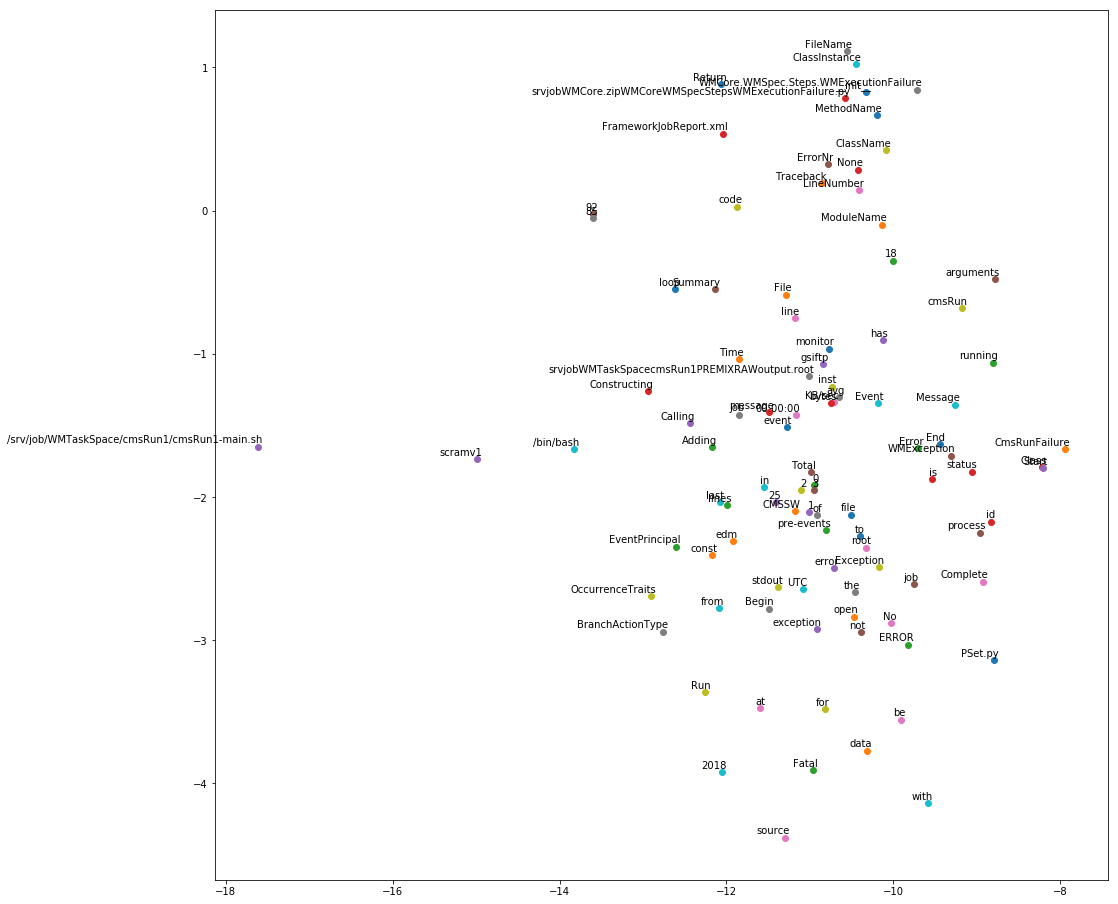

In [27]:
tsne_plot(w2vmodel_stemmed)

In [16]:
# Get TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
def dummy(doc):
    return doc
v = TfidfVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,)
x = v.fit_transform(df_msg['tokenized_text_filtered'])

In [17]:
tfidf_feat = v.get_feature_names()

In [219]:
print x

  (0, 39963)	0.03906554633937947
  (0, 51146)	0.04301646616238159
  (0, 25231)	0.04347257071631326
  (0, 51245)	0.0445523855512861
  (0, 51675)	0.032351941986656065
  (0, 40411)	0.07157962766947788
  (0, 54150)	0.04259564376008196
  (0, 36969)	0.23010696660056892
  (0, 49060)	0.08723911015676013
  (0, 52517)	0.14554201829681385
  (0, 44794)	0.07936068316500938
  (0, 41824)	0.15872136633001876
  (0, 45116)	0.5597372447570717
  (0, 45450)	0.07760210702886473
  (0, 44925)	0.07668520973930476
  (0, 37228)	0.19033457766346046
  (0, 48422)	0.07313791854244403
  (0, 56766)	0.07153860662993093
  (0, 51478)	0.05705660335856748
  (0, 47313)	0.07301556444565144
  (0, 17340)	0.21113186590022362
  (0, 45103)	0.07092139546215723
  (0, 45102)	0.14889558331209118
  (0, 52899)	0.07011349571063347
  (0, 47166)	0.07458927386685649
  :	:
  (94138, 45953)	0.03179943978818498
  (94138, 45496)	0.03119787237148965
  (94138, 40948)	0.02740215561925372
  (94138, 41831)	0.030078193399999235
  (94138, 51594)	0.02

In [28]:
def get_average_vector(text):
    return np.mean(np.array([w2vmodel_stemmed.wv[w] for w in text if w in w2vmodel_stemmed]), axis=0)

In [18]:
def get_average_vector_tfidf(df):
    
    tfidf_sent_vectors = []
    for index, row in df.iterrows():
        
        if(index%1000 == 0):
            print index
        weight_sum = 0
        sent_vec = np.zeros(100) 
        for word in row['tokenized_text_filtered']: # for each word in a review/sentence
            try:
                vec = w2vmodel_stemmed.wv[word]
                # obtain the tf_idfidf of a word in a sentence/review
                tfidf = x [row, tfidf_feat.index(word)]
                sent_vec += (vec * tfidf)
                weight_sum += tfidf
            except:
                errors =+1
                pass
        sent_vec /= weight_sum
        tfidf_sent_vectors.append(sent_vec)
    
    return tfidf_sent_vectors

In [ ]:
tfidf_sent_vectors = get_average_vector_tfidf(df_msg)

0


/usr/local/bin/start_ipykernel.py:20: RuntimeWarning: invalid value encountered in divide


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000


In [29]:
df_msg['w2v'] = df_msg['tokenized_text_filtered'].apply(get_average_vector)

/usr/local/bin/start_ipykernel.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if __name__ == '__main__':


In [51]:
type(text_vecs)

pandas.core.series.Series

In [30]:
clone_docs = df_msg[(df_msg['action'] == 'clone')].sample(3000)
acdc_docs = df_msg[(df_msg['action'] == 'acdc')].sample(3000)

In [31]:
test_docs = pd.concat([clone_docs, acdc_docs])

In [207]:
print len(test_docs)

6000


In [32]:
import matplotlib.cm as cm

In [33]:
def tsne_plot_classes(model, df, max_err):
    "Creates and TSNE model and plots it"
    labels = df['action']
    error_codes = df['error']
    error_codes_unique = list(df.groupby('error').size().reset_index(name='size').sort_values(by ='size',ascending=False  )['error'][0:10])
    error_colors = {}
    for counter, code in enumerate(error_codes_unique):
        error_colors[code] = counter
    print error_colors
    avg_vec = list(df['w2v'])
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(list(avg_vec))

    colors = cm.rainbow(np.linspace(0, 1, len(error_codes_unique)))    
    
    print len(colors), len(error_codes_unique)
    plt.figure(figsize=(16, 16)) 

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])


    for i in range(len(x)):

        error_code = error_codes.iloc[i]
        if error_code not in error_codes_unique:
            continue
        color = error_colors[error_code]
        #print error_code, color
        plt.scatter(x[i],y[i], c=colors[color])

        """
        if labels.iloc[i] == 'acdc':
            plt.scatter(x[i],y[i], c='red')
        else:
            plt.scatter(x[i],y[i], c='blue')

        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        """
    plt.show()
    
        

{8001: 7, 50660: 2, 99109: 8, 99303: 5, 50664: 3, 73: 6, 139: 4, 85: 1, 99401: 9, 92: 0}
10 10


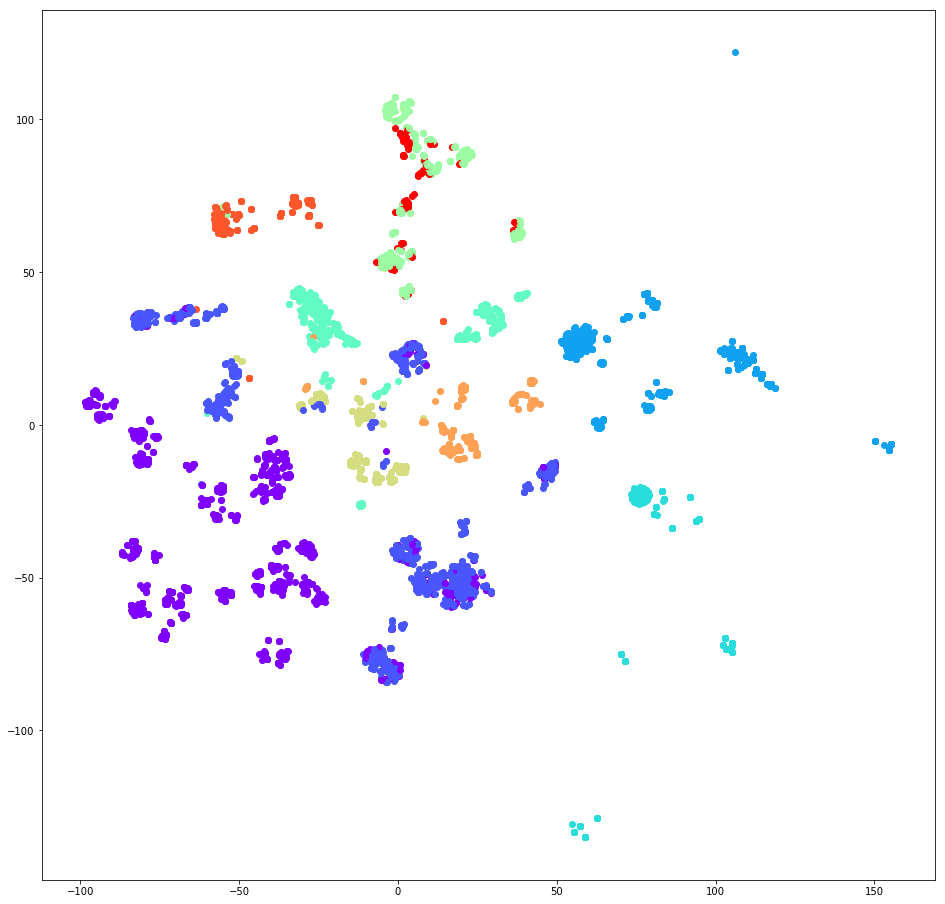

In [34]:
tsne_plot_classes(w2vmodel_stemmed, test_docs, 10)

## 3. Plot the wordcloud

In [87]:
counts = get_counts(df_msg, 'tokenized_text_filtered')

In [28]:
type(counts)

collections.Counter

In [88]:
import wordcloud
import matplotlib.pyplot as plt

In [92]:
wc = wordcloud.WordCloud(max_words=100, background_color="white", width=1200, height=800).generate_from_frequencies(counts)

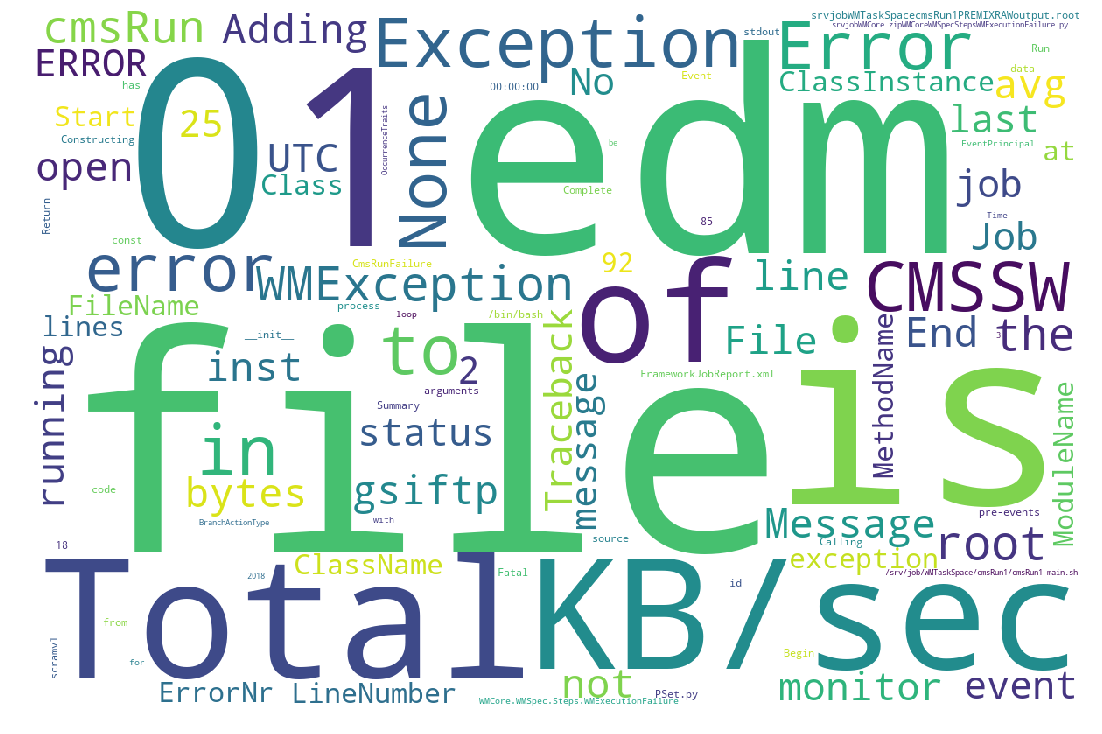

In [94]:
# plot the WordCloud image   
plt.figure( figsize=(20,10) )
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

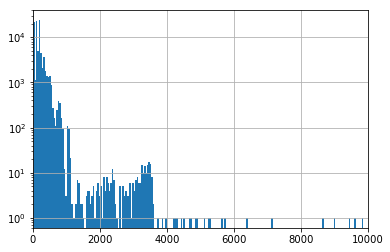

In [75]:
ax = df_msg['tokenized_text_filtered'].apply(lambda x: len(x)).hist(bins = 1000)
plt.xlim([0,10000])
ax.set_yscale('log')

## 4. Save everything

In [38]:
list(df_msg)

['task_name',
 'site',
 'error',
 'error_msg',
 'side_state',
 'action',
 'memory',
 'tokenized_text',
 'tokenized_text_filtered',
 'w2v']

In [52]:
out = df_msg.drop([ 'error_msg', 'side_state','action', 'memory', 'tokenized_text', 'tokenized_text_filtered' ], axis = 1)

In [53]:
def array_to_string(my_list):
    return '[' + ','.join([str(elem) for elem in my_list]) + ']'

In [54]:
out["w2v"]= out["w2v"].apply(array_to_string)

In [55]:
out.to_csv('w2v.csv')

In [56]:
out.head()

,task_name,site,error,w2v
0,/fabozzi_Run2016D-07Aug17-v1-SingleElectron-17...,T1_US_FNAL_Disk,85,"[1.4482799,0.22476405,0.033432815,3.7562597,0...."
1,/fabozzi_Run2017B-v1-DoubleMuon-09Oct2017_940p...,T1_RU_JINR,92,"[0.9791556,2.67359,1.319544,-0.08104949,-0.393..."
2,/fabozzi_Run2017F-v1-DoubleEG-17Nov2017_940_17...,T2_UK_London_Brunel,99109,"[3.4284968,0.39303666,-1.1540284,2.4560642,-0...."
3,/fabozzi_Run2017F-v1-DoubleMuon-09May2018_947_...,T2_US_MIT,8004,"[-1.9728225,5.15743,0.5315714,4.6925755,2.0639..."
4,/fabozzi_Run2017H-v1-FSQJet2-17Nov2017_944_180...,T2_US_Nebraska,92,"[0.5495655,2.638539,1.3184719,0.3907935,-0.384..."
